In [3]:
from fastai.vision.all import *

import kagglehub

In [2]:
path = kagglehub.dataset_download("dumitrux/architectural-styles-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/architectural-styles-dataset


# New Section

In [3]:
from pathlib import Path
usable_path = Path(path)

In [4]:
usable_path.ls()

(#3) [Path('/kaggle/input/architectural-styles-dataset/README.txt'),Path('/kaggle/input/architectural-styles-dataset/g-images-dataset'),Path('/kaggle/input/architectural-styles-dataset/architectural-styles-dataset')]

In [5]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(seed=42),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

dls = dblock.dataloaders(usable_path, bs=64)

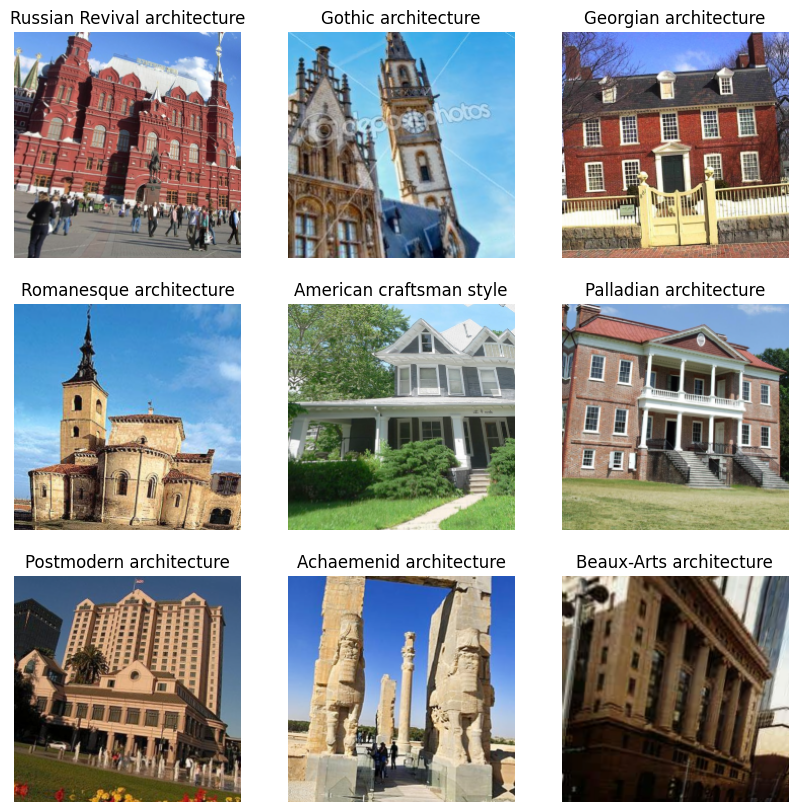

In [6]:
dls.show_batch(max_n=9, figsize=(10,10))

In [7]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 202MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.163795,1.333919,0.595593,00:32


epoch,train_loss,valid_loss,accuracy,time
0,1.299478,0.950811,0.704796,00:29


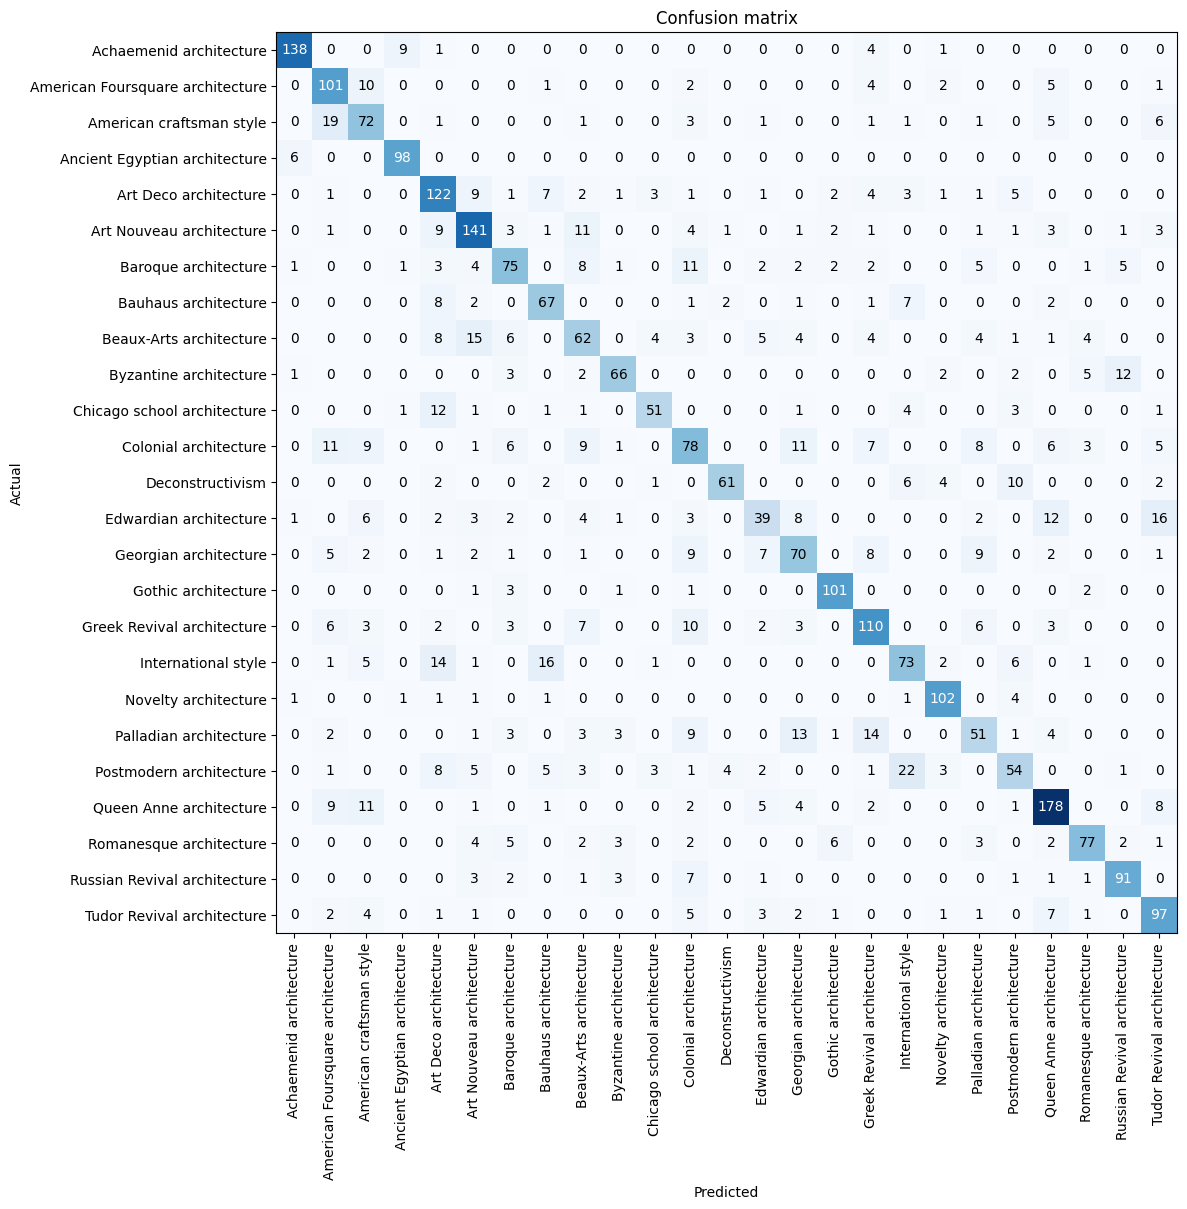

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12))

SuggestedLRs(valley=4.365158383734524e-05)

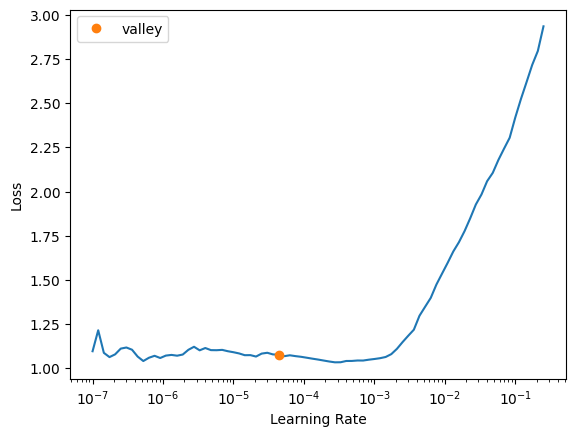

In [9]:
learn.lr_find()

In [12]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.852555,0.807480,0.749190,00:29
1,0.740979,0.699147,0.787103,00:28
2,0.556511,0.627720,0.812703,00:29
3,0.449954,0.615336,0.819507,00:29


In [13]:
learn.export("architectural-style-classifier.pkl")

In [4]:
learn = load_learner("architectural-style-classifier.pkl")

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [5]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()